In this notebook we use Python to draw [colorpleth maps](https://en.wikipedia.org/wiki/Choropleth_map) that report risk to assets, capacity, and resulting risk to welfare on a simpliied map of the Philippines.


## Get the Data

In [1]:
#The main library we use. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd

In [2]:
df_with_results = pd.read_csv("results/all_data_and_results.csv", index_col=0, skiprows=[0,2])
df_with_results.head()

,gdp_pc_pp,pop,pov_head,shew,gdp_pc_pp_nat,rel_gdp_pp,share1,axfin_p,axfin_r,social_p,...,delta_W,dcap,dcar,dKtot,deltaW_nat,dWpc_curency,risk,dWtot_currency,resilience,risk_to_assets
variable,,,,,,,,,,,,,,,,,,,,,
Abra,31.622466,240135.244121,0.373595,0.953416,42.034627,0.752296,1.581154,0.693233,0.693233,0.408683,...,1.289777,23.327162,6.385563,68949.106703,0.001108,0.297693,0.009414,71486.537312,0.964505,0.009080
Agusan Del Norte,43.726667,661728.454375,0.346715,0.821277,42.034627,1.040253,1.143467,0.496880,0.496880,0.388003,...,3.466083,59.013827,14.127680,1045292.663227,0.014958,0.901728,0.020622,596698.851824,1.751793,0.036125
Agusan Del Sur,30.897436,677779.682154,0.480785,0.821277,42.034627,0.735047,1.618257,0.475969,0.475969,0.388003,...,1.297550,45.915895,4.260075,324303.449247,0.004246,0.368549,0.011928,249795.328867,1.298277,0.015486
Aklan,30.515652,554414.442422,0.249662,0.823003,42.034627,0.725965,1.638503,0.660083,0.660083,0.432903,...,1.160890,29.024911,5.058524,884928.997753,0.002692,1.418152,0.046473,786243.818461,1.125515,0.052306
Albay,33.793313,1264097.894966,0.409587,0.800000,42.034627,0.803940,1.479583,0.551314,0.551314,0.403794,...,0.086197,25.955529,3.456525,197343.460390,0.000600,0.105786,0.003130,133724.434589,1.475747,0.004620


## Map the data

The following library, coded for this project, allows to plot maps. It produces [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) maps, that can be visualized in a browser, out of the box. 

It can also automatically transform those SVG maps into [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics) maps, but for that it requires that the free softaware [Inkspace](https://inkscape.org/en/download/) is installed on your computer. 
Finally, to automatically merge the map and the legend in a single file, it requires [ImageMagick](http://www.imagemagick.org/script/index.php).

In [3]:
#this library contains ad hoc functions, coded for this project, that allow to produce maps 
from maps_lib import * 

In [4]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: 
#this controls the font used in the legend
font = {'family' : 'sans serif',
    'size'   : 22}
plt.rc('font', **font)

The [blank map of the Philippines](map/PHL_adm1.svg) we use here is an SVG.
(It was built starting from a [shapefile](https://en.wikipedia.org/wiki/Shapefile) from [GADM.org](http://gadm.org), that was simplified with  [mapshaper.org](http://mapshaper.org) then converted to SVG with [Kartograph](http://kartograph.org/))

In [5]:
# path to the blank map 
svg_file_path = "map/PHL_adm1.svg"

#### First block: risk to assets 

Missing in series: Batanes; Dinagat Islands; Metropolitan Manila; Misamis Occidental; Negros Oriental; Shariff Kabunsuan; Siquijor; Surigao Del Sur


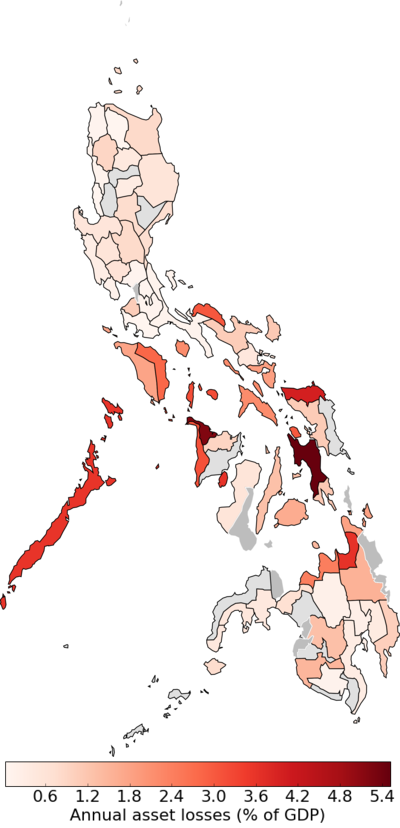

In [6]:
make_map_from_svg(
        df_with_results.risk_to_assets, #data 
        svg_file_path,                  #path to blank map
        outname="asset_risk",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
        color_maper=plt.cm.get_cmap("Reds"), #color scheme (from matplotlib. Chose them from http://colorbrewer2.org/)
        label="Annual asset losses (% of GDP)",
        new_title="Map of asset risk in the Philippines"  #title for the colored SVG
)

#### Second block: socio-economic capacity 

Missing in series: Batanes; Dinagat Islands; Metropolitan Manila; Misamis Occidental; Negros Oriental; Shariff Kabunsuan; Siquijor; Surigao Del Sur


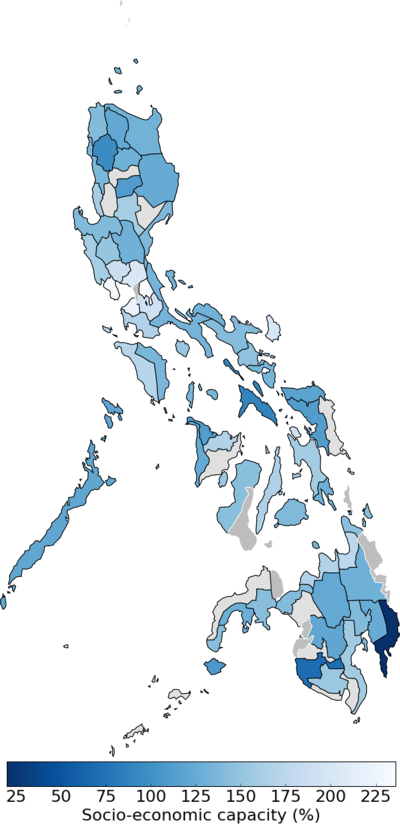

In [7]:
make_map_from_svg(
        df_with_results.resilience, 
        svg_file_path,
        outname="se_capacity", 
        color_maper=plt.cm.get_cmap("Blues_r"), 
        label="Socio-economic capacity (%)",
        new_title="Map of socio-economic capacity in the Philippines")

#### Total risk to welfare ($\frac {\text{asset risk}} {\text{socio-economic capacity}}$)

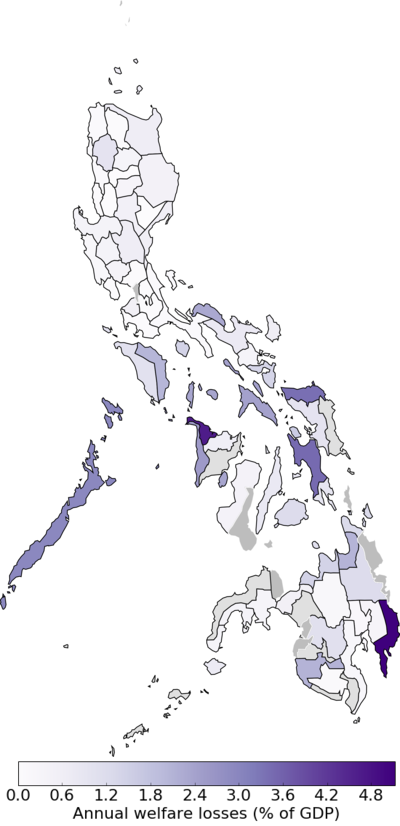

In [8]:
make_map_from_svg(
        df_with_results.risk, 
        svg_file_path,
        outname="welfare_risk", 
        color_maper=plt.cm.get_cmap("Purples"), 
        label="Annual welfare losses (% of GDP)",
        new_title="Map of welfare risk in the Philippines", verbose=False)